# image data load

In [32]:
import os

#image Directory/path

base_dir ='C:\\Users\\tasli\\3D Objects\\TensorFlow in Practice Specialization\\Convolutional Neural Networks in TensorFlow\\Food'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

# Directory with our training food/nonfood pictures
train_food_dir = os.path.join(train_dir, 'food')
train_nonfood_dir = os.path.join(train_dir, 'nonfood')

# Directory with our validation/test food/nonfood pictures
validation_food_dir = os.path.join(validation_dir, 'food')
validation_nonfood_dir = os.path.join(validation_dir, 'nonfood')


# first 5 training sample

In [33]:
train_food_fnames = os.listdir( train_food_dir )
train_nonfood_fnames = os.listdir( train_nonfood_dir )

print(train_food_fnames[:5])
print(train_nonfood_fnames[:5])

['1_0.jpg', '1_1.jpg', '1_10.jpg', '1_100.jpg', '1_1000.jpg']
['0_0.jpg', '0_1.jpg', '0_10.jpg', '0_100.jpg', '0_1000.jpg']


# total number of training and testing sample

In [34]:
print('total training food images :', len(os.listdir(train_food_dir)))
print('total training nonfood images :', len(os.listdir(train_nonfood_dir)))


print('total test food images :', len(os.listdir(validation_food_dir)))
print('total test nonfood images :', len(os.listdir(validation_nonfood_dir)))

total training food images : 1500
total training nonfood images : 1500
total test food images : 500
total test nonfood images : 500


# show 5 sample image

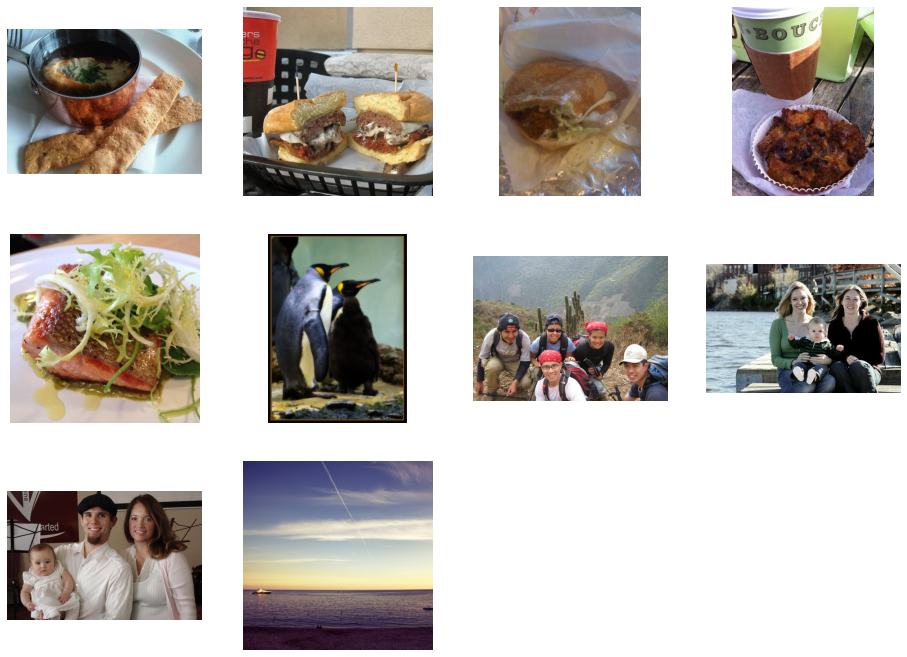

In [38]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=5

next_food_pix = [os.path.join(train_food_dir, fname) 
                for fname in train_food_fnames[ pic_index-5:pic_index] 
               ]

next_nonfood_pix = [os.path.join(train_nonfood_dir, fname) 
                for fname in train_nonfood_fnames[ pic_index-5:pic_index]
               ]

for i, img_path in enumerate(next_food_pix+next_nonfood_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


# Model

In [17]:
import tensorflow as tf

#### Here, 1 for food and 0 for nonfood 

In [18]:
model = tf.keras.models.Sequential([
    # the input shape of image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('nonfood') and 1 for the other ('food')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

# Model summary

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

# Model compile

In [40]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


# Flow training images in batches of 100 using train_datagen generator

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

# Flow validation images in batches of 100 using test_datagen generator

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=100,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Model fitting

In [43]:
history = model.fit(train_generator,
                              epochs=2,
                              verbose=1,
                              validation_data=validation_generator)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 30 steps, validate for 10 steps
Epoch 1/2
30/30 [==============================] - 694s 23s/step - loss: 0.7358 - accuracy: 0.6193 - val_loss: 0.5343 - val_accuracy: 0.7730
Epoch 2/2
30/30 [==============================] - 466s 16s/step - loss: 0.5462 - accuracy: 0.7493 - val_loss: 0.4685 - val_accuracy: 0.7970


# Evaluating Accuracy and Loss for the Model

Text(0.5, 1.0, 'Training and validation loss')

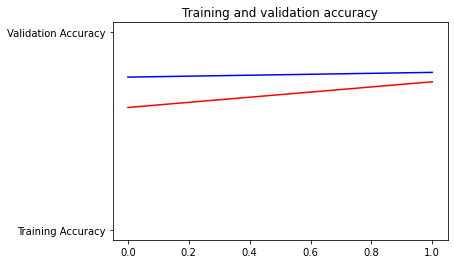

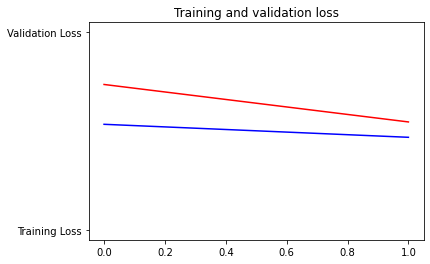

In [44]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt



acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs


# Plot training and validation accuracy per epoch

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()


# Plot training and validation loss per epoch

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

